# TP 2. PARTIE 2. PDA - QDA. k-NN

In [1]:
print("Hello world!")

Hello world!


## Plan :

   [- LDA-QDA](#1)
   
   [- Dataset Vowel](#2)
   
   [- k-NN](#3)   

In [3]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns


# 1. LDA-QDA


In [4]:
from sklearn import datasets
iris = datasets.load_iris()

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]


In [6]:
from sklearn.datasets import load_iris
# loading the iris dataset
iris = load_iris()
X = iris.data[: , [1,3]]
y = iris.target
h=.02

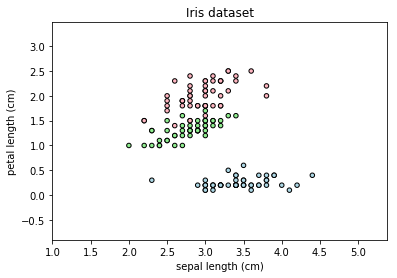

In [9]:
cmap_bold = ListedColormap(['#ADD8E6', '#90EE90','#FFB6C1'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.savefig("../lab-2-aminaghoul-master/sklearn_examples_iris")

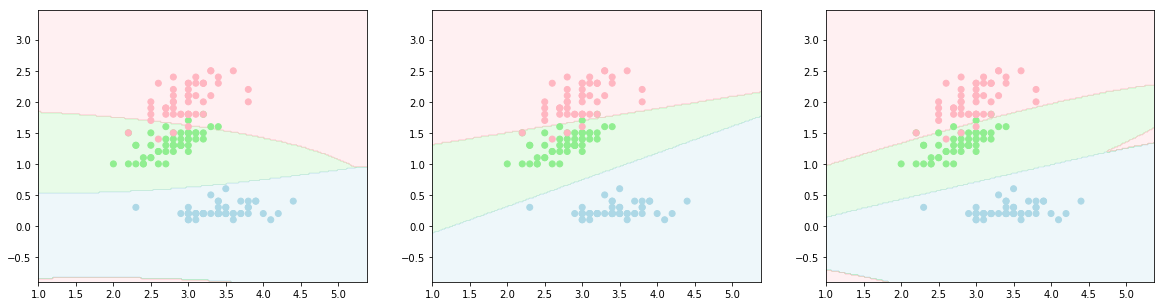

In [10]:
figure = plt.figure(figsize=(20, 5))
h = .02  # step size in the mesh
i=0
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):
    i += 1
    ax = plt.subplot(1, len(classifiers), i)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z_p = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    
    #print(Z_p.shape)
    
    # Put the result into a color plot
    Z = np.argmax(Z_p,axis=1) + 1
    Z = Z.reshape(xx.shape)
   
    ax.contourf(xx, yy, Z, cmap=cmap_bold, alpha=0.2)

    # Plot also the points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    

In [11]:
len(np.arange(x_min, x_max, h))*len(np.arange(y_min, y_max, h))

48400

In [12]:
np.c_[xx.ravel(), yy.ravel()].shape

(48400, 2)

In [13]:
Z

array([[3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=int64)

In [14]:
Z = np.argmax(Z_p,axis=1) + 1
print(len(np.c_[xx.ravel(), yy.ravel()]))
print(Z.shape[0])

48400
48400


# 2. Dataset Vowel


https://web.stanford.edu/~hastie/ElemStatLearn/data.html

In [15]:
#on charge l'échantillon train du dataset vowel
train=pd.read_csv('vowel.train.csv', sep=',',index_col=0) 
train.head

<bound method NDFrame.head of             y    x.1    x.2    x.3    x.4    x.5    x.6    x.7    x.8    x.9  \
row.names                                                                      
1           1 -3.639  0.418 -0.670  1.779 -0.168  1.627 -0.388  0.529 -0.874   
2           2 -3.327  0.496 -0.694  1.365 -0.265  1.933 -0.363  0.510 -0.621   
3           3 -2.120  0.894 -1.576  0.147 -0.707  1.559 -0.579  0.676 -0.809   
4           4 -2.287  1.809 -1.498  1.012 -1.053  1.060 -0.567  0.235 -0.091   
5           5 -2.598  1.938 -0.846  1.062 -1.633  0.764  0.394 -0.150  0.277   
6           6 -2.852  1.914 -0.755  0.825 -1.588  0.855  0.217 -0.246  0.238   
7           7 -3.482  2.524 -0.433  1.048 -1.995  0.902  0.322  0.450  0.377   
8           8 -3.941  2.305  0.124  1.771 -1.815  0.593 -0.435  0.992  0.575   
9           9 -3.860  2.116 -0.939  0.688 -0.675  1.679 -0.512  0.928 -0.167   
10         10 -3.648  1.812 -1.378  1.578  0.065  1.577 -0.466  0.702  0.060   
11        

In [16]:
#on charge l'échantillon test du dataset vowel
test=pd.read_csv('vowel.test.csv', sep=',',index_col=0)
test.head

<bound method NDFrame.head of             y    x.1    x.2    x.3    x.4    x.5    x.6    x.7    x.8    x.9  \
row.names                                                                      
1           1 -1.149 -0.904 -1.988  0.739 -0.060  1.206  0.864  1.196 -0.300   
2           2 -2.613 -0.092 -0.540  0.484  0.389  1.741  0.198  0.257 -0.375   
3           3 -2.505  0.632 -0.593  0.304  0.496  0.824 -0.162  0.181 -0.363   
4           4 -1.768  1.769 -1.142 -0.739 -0.086  0.120 -0.230  0.217 -0.009   
5           5 -2.671  3.155 -0.514  0.133 -0.964  0.234 -0.071  1.192  0.254   
6           6 -2.509  1.326  0.354  0.663 -0.724  0.418 -0.496  0.713  0.638   
7           7 -2.764  1.111  0.727  1.540 -0.855  0.261 -1.110  0.227  0.420   
8           8 -3.816  3.426  0.224 -0.384 -1.733  0.434 -0.322  1.333  0.653   
9           9 -3.839  1.248  0.830  0.982 -1.110  0.617 -0.751  0.084  0.309   
10         10 -4.982  1.538  0.960  1.253 -0.640  0.588 -0.484 -0.310 -0.246   
11        

Répéter l'analyse faite sur le dataset iris avec les données vowel.

[ 1  2  3  4  5  6  7  8  9 10 11]


array([48, 48, 48, 48, 48, 48, 48, 48, 48, 48], dtype=int64)

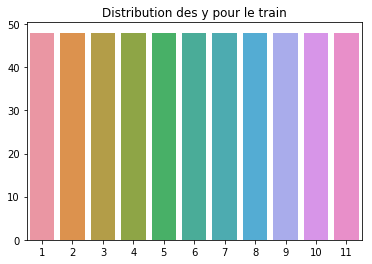

In [17]:
print(np.unique(train['y'])) # le label prend 11 valeurs distinctes de 1 à 11

"""label discret pb de classification multiclasse à 11 classes on vérifie si le nombre d'observations par classes
class balancing est bien équilibré.
On représente donc la distribution des y
"""
#pour le train :
plt.title("Distribution des y pour le train")
sns.barplot(np.unique(train['y']),train.groupby('y').count().values[:,0])

train.groupby('y').count().values[0,:]

array([42, 42, 42, 42, 42, 42, 42, 42, 42, 42], dtype=int64)

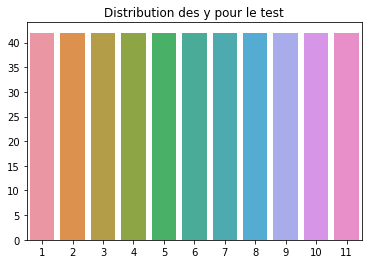

In [18]:
#pour le test :
plt.title("Distribution des y pour le test")
sns.barplot(np.unique(test['y']),test.groupby('y').count().values[:,0])
test.groupby('y').count().values[0,:]


On voit que les classes sont bien équilibrés sur le train et le test

In [46]:
#On définit les matrices X_train et X_test de features et les vecteurs de Y_train et Y_test de label

Y_train=train.values[:,0]
X_train=train.values[:,1:]

Y_test=test.values[:,0]
X_test=test.values[:,1:]



# Machine learning


On calcule l'accuracy sur le train et le test pour le naive bayes, lda et qda.


# Naive Bayes

In [20]:
NB=GaussianNB()
NB_fit=NB.fit(X=X_train,y=Y_train)

print("Le score d'accuracy sur le train est" ,accuracy_score(NB_fit.predict(X_train),Y_train))
print("Le score d'accuracy sur le test est",accuracy_score(NB_fit.predict(X_test),Y_test))



Le score d'accuracy sur le train est 0.7196969696969697
Le score d'accuracy sur le test est 0.461038961038961


# LDA 

In [21]:
lda = LinearDiscriminantAnalysis()
lda_fit = lda.fit(X=X_train, y=Y_train)

print("Le score d'accuracy sur le train est" ,accuracy_score(lda_fit.predict(X_train),Y_train))
print("Le score d'accuracy sur le test est",accuracy_score(lda_fit.predict(X_test),Y_test))

Le score d'accuracy sur le train est 0.6837121212121212
Le score d'accuracy sur le test est 0.44372294372294374


# QDA

In [22]:
qda = QuadraticDiscriminantAnalysis()
qda_fit = qda.fit(X=X_train, y=Y_train)

print("Le score d'accuracy sur le train est" ,accuracy_score(qda_fit.predict(X_train),Y_train))
print("Le score d'accuracy sur le test est",accuracy_score(qda_fit.predict(X_test),Y_test))

Le score d'accuracy sur le train est 0.9886363636363636
Le score d'accuracy sur le test est 0.47186147186147187


On remarque que c'est pour le QDA que le score d'acuracy sur le test est le plus grand.
Donc le QDA est l'algorithme le plus efficace comparé au lda et naive bayes.

<img src="https://media1.giphy.com/media/LNXivXzMwd7W0/giphy.gif" width = 300>
<a id="3"></a> 
 
# 3. k-NN

https://openclassrooms.com/courses/initiez-vous-au-machine-learning/tp-entrainez-le-modele-des-k-plus-proches-voisins-k-nn

Utiliser l'algo k-NN pour différents k et comparez ses performances avec les méthodes précédentes.

On calcule les accuracy des train dans acc_train et des test dans acc_test par la méthode k-NN pour k allant de 1 à 50.

In [23]:
acc_train=[]
acc_test=[]

for k in range(1,50):
    knn = neighbors.KNeighborsClassifier(k)
    knn_fit=knn.fit(X=X_train,y=Y_train)
    acc_train.append(accuracy_score(knn_fit.predict(X_train),Y_train))
    acc_test.append(accuracy_score(knn_fit.predict(X_test),Y_test))
    


On affiche les courbes d'accuracy pour k allant de 1 à 50 
on met en évidence k_hat : le k tel que l'accuracy de l'échantillon test par la méthode k-NN est la plus grande

5
Le score d'accuracy sur le train pour k-hat est 0.9772727272727273
Le score d'accuracy sur le test pour k_hat est 0.6082251082251082


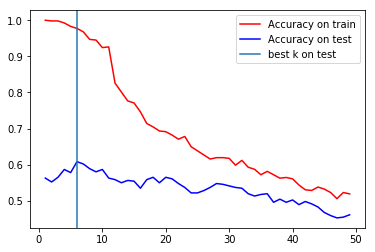

In [24]:
k_hat=np.argmax(acc_test)
print(k_hat) #affiche 5 mais k_hat=6 car le tableau acc_test est indicé de 0 à 49

plt.plot(np.arange(1,50),acc_train,'r',label="Accuracy on train")
plt.plot(np.arange(1,50),acc_test,'b', label="Accuracy on test")
plt.axvline(np.arange(1,50)[k_hat],label="best k on test")
plt.legend()

print("Le score d'accuracy sur le train pour k-hat est" ,acc_train[k_hat])
print("Le score d'accuracy sur le test pour k_hat est",acc_test[k_hat])

# Comparaison

On remarque que c'est pour le k-NN que le score d'acuracy sur le test est le plus grand.
Donc l'algorithme k-NN est le plus efficace.

## Cross-validation

In [39]:
#On ajoute l'algorithme knn au tableau classifiers au tableau des nom des classifiers

classifiers.append(KNeighborsClassifier())
names.append("KKN")



In [60]:
# On concatène Y_train et Y_test pour avoir Y et pareil pour X
Y=np.concatenate((Y_train,Y_test))
X=np.concatenate((X_train,X_test))


['Naive Bayes', 'LDA', 'QDA', 'KKN']  0.5969696969696969
['Naive Bayes', 'LDA', 'QDA', 'KKN']  0.5333333333333334
['Naive Bayes', 'LDA', 'QDA', 'KKN']  0.6656565656565656
['Naive Bayes', 'LDA', 'QDA', 'KKN']  0.7252525252525253


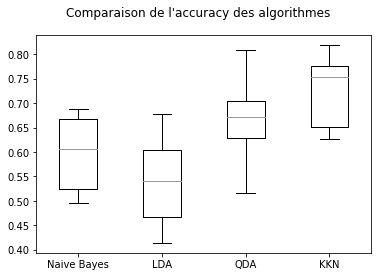

In [74]:
results = [] #tableau contenant les moyennes de l'accuracy pour chaque algorithme

for model in (classifiers):
    cv_results = model_selection.cross_val_score(model, X, Y, cv=10,scoring='accuracy')
    results.append(cv_results)
    print(names,"",cv_results.mean())
    #le premier résultat correspond à la valeur moyenne de l'accuracy pour naive bayes
    #le deuxième résultat correspond à la valeur moyenne de l'accuracy pour LDA
    #Le troisième résultat correspond à la valeur moyenne de l'accuracy pour QDA
    #Le quatrième résultat correspond à la valeur moyenne de l'accuracy pourKNN
    
# boxplot pour comparer les algorithmes
fig = plt.figure()
fig.suptitle('Comparaison de l\'accuracy des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Conclusion

Le knn est l'algorithme le plus efficace car son accuracy est plus grande que celle des autres algorithmes.